In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

OSUN STATE ELECTION RESULT ANALYSIS

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving OSUN_crosschecked - OSUN_crosschecked.csv.csv to OSUN_crosschecked - OSUN_crosschecked.csv (1).csv


In [ ]:
main_df = pd.read_csv('OSUN_crosschecked - OSUN_crosschecked.csv.csv')

In [ ]:
main_df

,State,LGA,Ward,PU-Code,PU-Name,Full Address,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,...,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,Latitude,Longitude,APC,LP,PDP,NNPP,Results_File
0,OSUN,ATAKUMOSA EAST,IWARA,29-01-01-001,TOWN HALL IWARA,OSUN ATAKUMOSA EAST IWARA TOWN HALL IWARA,181,942,True,-1,...,False,False,UNKNOWN,7.522265,4.704799,44,273,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
1,OSUN,ATAKUMOSA EAST,IWARA,29-01-01-003,"L.A. SCHOOL, IWIKUN","OSUN ATAKUMOSA EAST IWARA L.A. SCHOOL, IWIKUN",245,881,True,-1,...,False,False,UNKNOWN,7.531917,4.717406,40,11,175,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2,OSUN,ATAKUMOSA EAST,IWARA,29-01-01-004,"METHODIST PRY. SCHOOL, AYETORO",OSUN ATAKUMOSA EAST IWARA METHODIST PRY. SCHOO...,117,308,True,-1,...,False,False,UNKNOWN,7.531917,4.717406,14,3,99,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3,OSUN,ATAKUMOSA EAST,IWARA,29-01-01-007,OPEN SPACE ODO-IWARA,OSUN ATAKUMOSA EAST IWARA OPEN SPACE ODO-IWARA,187,538,True,-1,...,False,False,UNKNOWN,7.531917,4.717406,25,4,155,0,https://docs.inecelectionresults.net/elections...
4,OSUN,ATAKUMOSA EAST,IGANGAN,29-01-02-001,"N.U.D PRY. SCHOL, IGANGAN","OSUN ATAKUMOSA EAST IGANGAN N.U.D PRY. SCHOL, ...",187,558,True,-1,...,False,False,UNKNOWN,7.488730,4.717406,22,0,161,0,https://docs.inecelectionresults.net/elections...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,OSUN,OSOGBO,ATAOJA 'E',29-30-05-042,"OPEN SPACE, SALVATION ARMY PRY.SCHOOL CAR PARK...","OSUN OSOGBO ATAOJA 'E' OPEN SPACE, SALVATION ...",157,546,True,-1,...,False,False,UNKNOWN,7.770456,4.551563,25,4,14,2,https://docs.inecelectionresults.net/elections...
2244,OSUN,OSOGBO,ATAOJA 'E',29-30-11-019,"OPEN SPACE, SALVATION ARMY PRY.SCHOOL CAR PARK...","OSUN OSOGBO ATAOJA 'E' OPEN SPACE, SALVATION ...",157,546,True,-1,...,False,False,UNKNOWN,7.770456,4.551563,65,19,56,0,https://docs.inecelectionresults.net/elections...
2245,OSUN,OSOGBO,BABA KEKERE,29-30-14-019,"OPEN SPACE, BOOSERE STREET JUNCTION, AROGUNMAS...","OSUN OSOGBO BABA KEKERE OPEN SPACE, BOOSERE ST...",139,179,True,-1,...,False,False,UNKNOWN,7.791351,4.520474,46,4,50,1,https://docs.inecelectionresults.net/elections...
2246,OSUN,OSOGBO,BABA KEKERE,29-30-14-020,"OPEN SPACE, BOOSERE STREET JUNCTION, AROGUNMAS...","OSUN OSOGBO BABA KEKERE OPEN SPACE, BOOSERE ST...",139,179,True,-1,...,False,False,UNKNOWN,7.791351,4.520474,25,5,44,1,https://docs.inecelectionresults.net/elections...


In [ ]:
missing_values = main_df[['Latitude', 'Longitude']].isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 Latitude     0
Longitude    0
dtype: int64


In [ ]:
main_df['latitude_radians'] =  np.radians(main_df['Latitude'])
main_df['longitude_radians'] = np.radians(main_df['Longitude'])

In [ ]:
print("First few rows of the dataframe:\n", main_df.head())


First few rows of the dataframe:
   State             LGA     Ward       PU-Code  \
0  OSUN  ATAKUMOSA EAST    IWARA  29-01-01-001   
1  OSUN  ATAKUMOSA EAST    IWARA  29-01-01-003   
2  OSUN  ATAKUMOSA EAST    IWARA  29-01-01-004   
3  OSUN  ATAKUMOSA EAST    IWARA  29-01-01-007   
4  OSUN  ATAKUMOSA EAST  IGANGAN  29-01-02-001   

                          PU-Name  \
0                 TOWN HALL IWARA   
1             L.A. SCHOOL, IWIKUN   
2  METHODIST PRY. SCHOOL, AYETORO   
3            OPEN SPACE ODO-IWARA   
4       N.U.D PRY. SCHOL, IGANGAN   

                                        Full Address  Accredited_Voters  \
0         OSUN ATAKUMOSA EAST IWARA TOWN HALL IWARA                 181   
1     OSUN ATAKUMOSA EAST IWARA L.A. SCHOOL, IWIKUN                 245   
2  OSUN ATAKUMOSA EAST IWARA METHODIST PRY. SCHOO...                117   
3    OSUN ATAKUMOSA EAST IWARA OPEN SPACE ODO-IWARA                 187   
4  OSUN ATAKUMOSA EAST IGANGAN N.U.D PRY. SCHOL, ...               

In [ ]:
coords = main_df[['latitude_radians', 'longitude_radians']].values
if coords.size == 0:
    raise ValueError("Coordinates array is empty. Check your data and merging process.")

dist_matrix = haversine_distances(coords) * 6371  # Convert to kilometers

In [ ]:
radius = 1

In [ ]:
 #Identify neighbors within the radius
neighbors = {i: np.where(dist_matrix[i] <= radius)[0] for i in range(len(main_df))}


In [ ]:
def calculate_outlier_scores(neighbors, main_df, id_column):
    outlier_scores = []
    for i, neighbor_indices in neighbors.items():
        neighbor_values = main_df.iloc[neighbor_indices][['APC', 'LP', 'PDP', 'NNPP']]
        mean_neighbors = neighbor_values.mean()
        std_neighbors = neighbor_values.std()
        score = ((main_df.iloc[i][['APC', 'LP', 'PDP', 'NNPP']] - mean_neighbors) / std_neighbors).abs().mean()
        outlier_scores.append((main_df.iloc[i][id_column], score))
    return pd.DataFrame(outlier_scores, columns=[id_column, 'outlier_score'])


In [ ]:
def calculate_outlier_scores(neighbors, main_df, id_column, party_column):
    outlier_scores = []
    for i, neighbor_indices in neighbors.items():
        neighbor_values = main_df.iloc[neighbor_indices][party_column]
        mean_neighbors = neighbor_values.mean()
        std_neighbors = neighbor_values.std()
        # Handle division by zero
        if std_neighbors == 0:
            score = 0
        else:
            score = abs((main_df.iloc[i][party_column] - mean_neighbors) / std_neighbors)
        outlier_scores.append((main_df.iloc[i][id_column], score))
    return pd.DataFrame(outlier_scores, columns=[id_column, 'outlier_score'])


In [ ]:
for party in ['APC', 'LP', 'PDP', 'NNPP']:
    score_col = f'{party}_outlier_score'
    party_col = party  # Assuming the party column names are 'APC', 'LP', 'PDP', 'NNPP'
    outlier_scores_unique = calculate_outlier_scores(neighbors, main_df, 'PU-Name', party_col)
    outlier_scores_unique = outlier_scores_unique.drop_duplicates(subset=['PU-Name'])
    main_df[score_col] = main_df['PU-Name'].map(outlier_scores_unique.set_index('PU-Name')['outlier_score'])

# Check if outlier score columns are created
print(main_df.columns)


Index(['State', 'LGA', 'Ward', 'PU-Code', 'PU-Name', 'Full Address',
       'Accredited_Voters', 'Registered_Voters', 'Results_Found',
       'Transcription_Count', 'Result_Sheet_Stamped', 'Result_Sheet_Corrected',
       'Result_Sheet_Invalid', 'Result_Sheet_Unclear', 'Result_Sheet_Unsigned',
       'Latitude', 'Longitude', 'APC', 'LP', 'PDP', 'NNPP', 'Results_File',
       'latitude_radians', 'longitude_radians', 'APC_outlier_score',
       'LP_outlier_score', 'PDP_outlier_score', 'NNPP_outlier_score'],
      dtype='object')


In [ ]:
import folium

In [ ]:
m = folium.Map(location=[main_df['Latitude'].mean(), main_df['Longitude'].mean()], zoom_start=12)


In [ ]:
for index, row in main_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(
            f"Polling Unit: {row['PU-Name']}\n"
            f"APC Outlier Score: {row['APC_outlier_score']}\n"
            f"LP Outlier Score: {row['LP_outlier_score']}\n"
            f"PDP Outlier Score: {row['PDP_outlier_score']}\n"
            f"NNPP Outlier Score: {row['NNPP_outlier_score']}"
        )
    ).add_to(m)

# Save the map as an HTML file
m.save('polling_units_map.html')



In [ ]:
m

In [ ]:
all_outlier_scores = []
for party in ['APC', 'LP', 'PDP', 'NNPP']:
    score_col = f'{party}_outlier_score'
    party_col = party  # Assuming the party column names are 'APC', 'LP', 'PDP', 'NNPP'
    outlier_scores_unique = calculate_outlier_scores(neighbors, main_df, 'PU-Name', party_col)
    outlier_scores_unique = outlier_scores_unique.drop_duplicates(subset=['PU-Name'])
    main_df[score_col] = main_df['PU-Name'].map(outlier_scores_unique.set_index('PU-Name')['outlier_score'])
    outlier_scores_unique['party'] = party
    all_outlier_scores.append(outlier_scores_unique)
    outlier_scores = pd.concat(all_outlier_scores)

# Save outlier scores to CSV
sorted_outliers = outlier_scores.sort_values(by='outlier_score', ascending=False)
sorted_outliers.to_csv('sorted_outlier_scores.csv', index=False)
print(sorted_outliers.head())

                       PU-Name  outlier_score party
2122      24, OLUGUNNA STREET`       9.305832  NNPP
447                    ODE-OKE       6.325954  NNPP
1586                     OLOYE       6.084870  NNPP
1930          11A, ADENLE LANE       5.646967  NNPP
643   A.U.I PRY. SCHOOL,OLAOLU       5.598925  NNPP


In [ ]:
top_outliers = sorted_outliers.groupby('party').head(3)
top_outliers.to_csv('top_outliers.csv', index=False)
print(top_outliers)

                                                PU-Name  outlier_score party
2122                               24, OLUGUNNA STREET`       9.305832  NNPP
447                                             ODE-OKE       6.325954  NNPP
1586                                              OLOYE       6.084870  NNPP
2148                             ST. ANDREW PRY. SCHOOL       4.727716    LP
1572                       HOSPITAL ROAD, KUTI JUNCTION       4.264961    LP
364   OPEN SPACE IN FRONT OF BAALE ILE ARANYIN( ARAN...       3.995262   APC
415                         56, AKODA COMP.S AGATE ROAD       3.943034   APC
1807                        JALUGUN/AIBIO SQUARE, INISA       3.854116    LP
807                       ENUWA SQUARE, PALACE FRONTAGE       3.799836   PDP
856                HOLY SAVIOUR'S PRY. SCHOOL, OKE TUBU       3.551842   APC
2135                                  14, ARERUWE HOTEL       3.271152   PDP
731                                         AGBEDE AREA       2.866216   PDP

In [ ]:
top_outliers = pd.DataFrame(top_outliers)

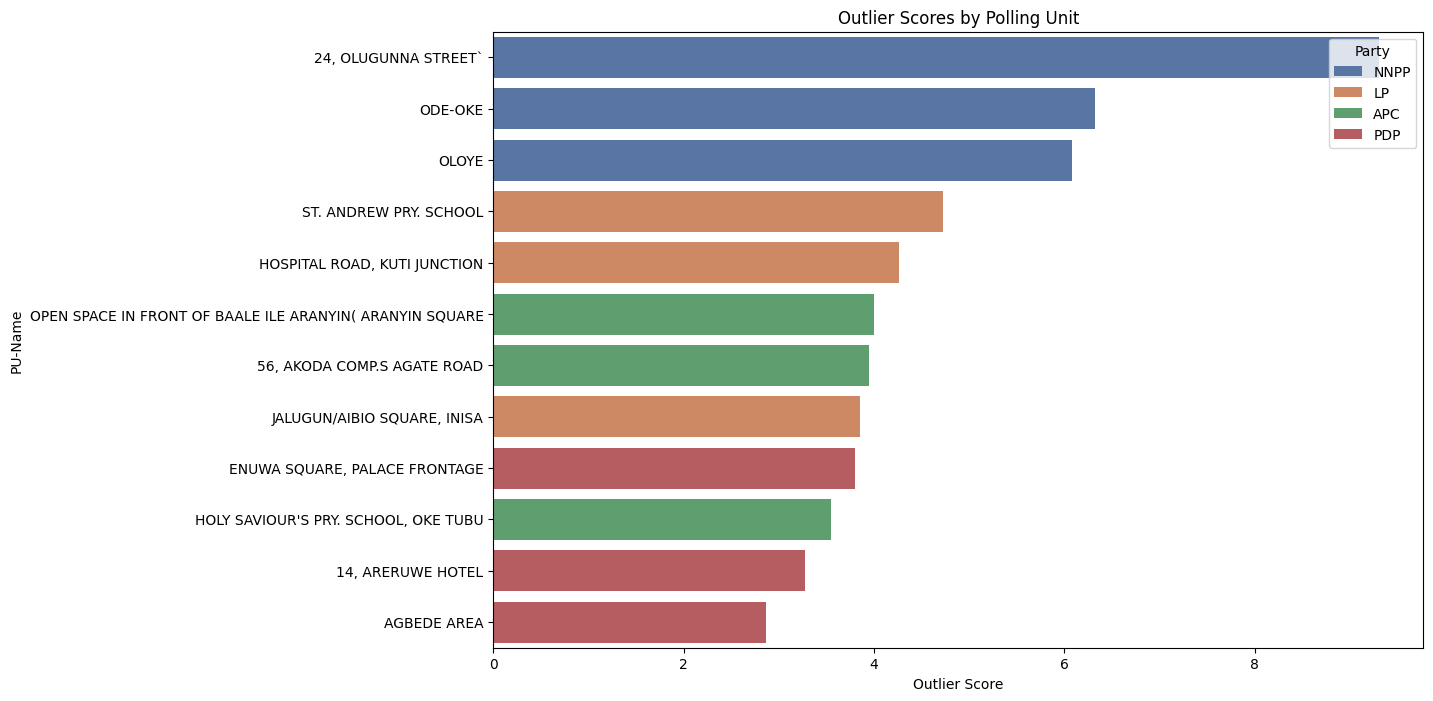

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_outliers, x='outlier_score', y='PU-Name', hue='party', dodge=False, palette='deep')

# Add titles and labels
plt.title('Outlier Scores by Polling Unit')
plt.xlabel('Outlier Score')
plt.ylabel('PU-Name')
plt.legend(title='Party', loc='upper right')

<ipython-input-35-5daf47e607a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(top_outliers, x='party', y='outlier_score', palette='deep')


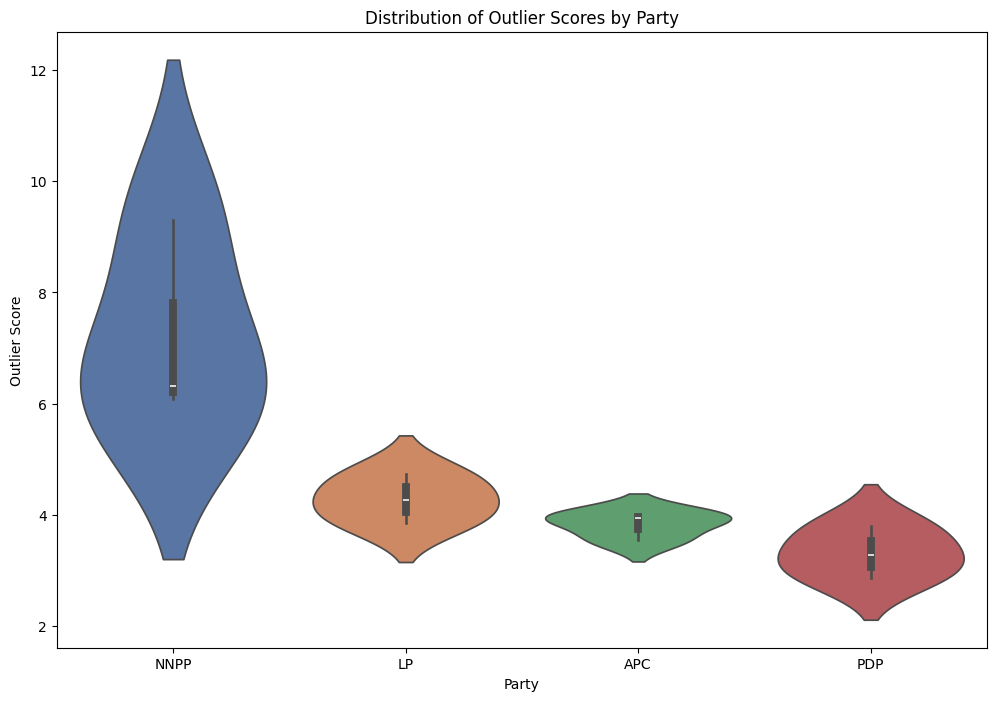

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(top_outliers, x='party', y='outlier_score', palette='deep')
plt.title('Distribution of Outlier Scores by Party')
plt.xlabel('Party')
plt.ylabel('Outlier Score')
plt.show()

In [ ]:
for index, row in top_outliers.iterrows():
    identifier = row['PU-Name']
    party = row['party']
    score = row['outlier_score']
    print(f"Unit {identifier} is an outlier for {party} with an outlier score of {score}.")

# Save the full dataset with calculated columns
main_df.to_csv('full_dataset_with_calculations.csv', index=False)

# Print statements to confirm saving
print("Sorted outlier scores saved to 'sorted_outlier_scores.csv'")
print("Top 3 outliers for each party saved to 'top_outliers.csv'")
print("Full dataset with calculations saved to 'full_dataset_with_calculations.csv'")


Unit 24, OLUGUNNA STREET` is an outlier for NNPP with an outlier score of 9.305831747980928.
Unit ODE-OKE is an outlier for NNPP with an outlier score of 6.32595358455859.
Unit OLOYE is an outlier for NNPP with an outlier score of 6.08486984459331.
Unit ST. ANDREW PRY. SCHOOL is an outlier for LP with an outlier score of 4.727716352708542.
Unit HOSPITAL ROAD, KUTI JUNCTION is an outlier for LP with an outlier score of 4.264960893118739.
Unit OPEN SPACE IN FRONT OF BAALE ILE ARANYIN( ARANYIN SQUARE is an outlier for APC with an outlier score of 3.995261977310007.
Unit 56, AKODA COMP.S AGATE ROAD is an outlier for APC with an outlier score of 3.9430342970400085.
Unit JALUGUN/AIBIO SQUARE, INISA is an outlier for LP with an outlier score of 3.854116050447401.
Unit ENUWA SQUARE, PALACE FRONTAGE is an outlier for PDP with an outlier score of 3.799836179464651.
Unit HOLY SAVIOUR'S PRY. SCHOOL, OKE TUBU is an outlier for APC with an outlier score of 3.5518416893639.
Unit 14, ARERUWE HOTEL is 

In [ ]:
main_df

,State,LGA,Ward,PU-Code,PU-Name,Full Address,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,...,LP,PDP,NNPP,Results_File,latitude_radians,longitude_radians,APC_outlier_score,LP_outlier_score,PDP_outlier_score,NNPP_outlier_score
0,OSUN,ATAKUMOSA EAST,IWARA,29-01-01-001,TOWN HALL IWARA,OSUN ATAKUMOSA EAST IWARA TOWN HALL IWARA,181,942,True,-1,...,273,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,0.131288,0.082114,NaN,NaN,NaN,NaN
1,OSUN,ATAKUMOSA EAST,IWARA,29-01-01-003,"L.A. SCHOOL, IWIKUN","OSUN ATAKUMOSA EAST IWARA L.A. SCHOOL, IWIKUN",245,881,True,-1,...,11,175,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,0.131457,0.082334,1.375364,1.396424,0.936250,0.866025
2,OSUN,ATAKUMOSA EAST,IWARA,29-01-01-004,"METHODIST PRY. SCHOOL, AYETORO",OSUN ATAKUMOSA EAST IWARA METHODIST PRY. SCHOO...,117,308,True,-1,...,3,99,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,0.131457,0.082334,0.859602,0.322252,0.264678,0.866025
3,OSUN,ATAKUMOSA EAST,IWARA,29-01-01-007,OPEN SPACE ODO-IWARA,OSUN ATAKUMOSA EAST IWARA OPEN SPACE ODO-IWARA,187,538,True,-1,...,4,155,0,https://docs.inecelectionresults.net/elections...,0.131457,0.082334,0.085960,0.107417,0.620216,0.866025
4,OSUN,ATAKUMOSA EAST,IGANGAN,29-01-02-001,"N.U.D PRY. SCHOL, IGANGAN","OSUN ATAKUMOSA EAST IGANGAN N.U.D PRY. SCHOL, ...",187,558,True,-1,...,0,161,0,https://docs.inecelectionresults.net/elections...,0.130703,0.082334,0.385197,0.725866,1.152332,0.577350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,OSUN,OSOGBO,ATAOJA 'E',29-30-05-042,"OPEN SPACE, SALVATION ARMY PRY.SCHOOL CAR PARK...","OSUN OSOGBO ATAOJA 'E' OPEN SPACE, SALVATION ...",157,546,True,-1,...,4,14,2,https://docs.inecelectionresults.net/elections...,0.135620,0.079440,1.931631,0.233331,1.433484,0.328655
2244,OSUN,OSOGBO,ATAOJA 'E',29-30-11-019,"OPEN SPACE, SALVATION ARMY PRY.SCHOOL CAR PARK...","OSUN OSOGBO ATAOJA 'E' OPEN SPACE, SALVATION ...",157,546,True,-1,...,19,56,0,https://docs.inecelectionresults.net/elections...,0.135620,0.079440,1.931631,0.233331,1.433484,0.328655
2245,OSUN,OSOGBO,BABA KEKERE,29-30-14-019,"OPEN SPACE, BOOSERE STREET JUNCTION, AROGUNMAS...","OSUN OSOGBO BABA KEKERE OPEN SPACE, BOOSERE ST...",139,179,True,-1,...,4,50,1,https://docs.inecelectionresults.net/elections...,0.135985,0.078897,0.273377,0.637826,0.097518,0.415900
2246,OSUN,OSOGBO,BABA KEKERE,29-30-14-020,"OPEN SPACE, BOOSERE STREET JUNCTION, AROGUNMAS...","OSUN OSOGBO BABA KEKERE OPEN SPACE, BOOSERE ST...",139,179,True,-1,...,5,44,1,https://docs.inecelectionresults.net/elections...,0.135985,0.078897,0.273377,0.637826,0.097518,0.415900


In [ ]:
top_outliers

NameError: name 'top_outliers' is not defined